Методы и алгоритмы обработки слабоструктурированных данных
Лабораторная работа №4 
Болотов М.В. АСУ4-22-1м

In [22]:
import os
import nltk
import zipfile
import string
import pymorphy2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer

In [23]:

nltk.download('stopwords')                                               # Загрузка списка стоп-слов из библиотеки NLTK

stop_words = set(nltk.corpus.stopwords.words('russian'))                 # Получение списка стоп-слов для русского языка

morph = pymorphy2.MorphAnalyzer()                                        # Создание объекта для лемматизации слов

zip_file_path = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\4 семестр\Методы и алгоритмы обработки слабоструктурированных данных\lr4\2 ver\2021_SPORT.zip"  # Пути к zip-архиву и каталогу для извлечения файлов
extraction_dir = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\4 семестр\Методы и алгоритмы обработки слабоструктурированных данных\lr4\2 ver\Каталог"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:                     # Извлечение файлов из архива
    zip_ref.extractall(extraction_dir)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79125\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def process_text(text):                                                  # Функция для обработки текста файла: токенизация, удаление стоп-слов и лемматизация
    tokens = nltk.word_tokenize(text)                                                     # Токенизация текста
    tokens = [token for token in tokens if token not in string.punctuation + '«»']        # Удаление знаков препинания и кавычек
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]      # Удаление стоп-слов
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in filtered_tokens]  # Лемматизация токенов
    return lemmatized_tokens

In [25]:
def process_folder(folder_path):                                         # Функция для обработки файлов в указанной папке
    corpus = []
    for filename in os.listdir(folder_path):                             # Перебор файлов в папке
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:         # Чтение текста из файла
                text = file.read()
                processed_text = process_text(text)                      # Обработка текста файла
                corpus.append(' '.join(processed_text))                  # Объединение токенов в строку
    return corpus

In [26]:
corpus_combined = []                                                     # Создание корпуса для каждой папки в extraction_dir
for folder in os.listdir(extraction_dir):
    folder_path = os.path.join(extraction_dir, folder)
    if os.path.isdir(folder_path):
        corpus = process_folder(folder_path)                             # Обработка файлов в папке
        corpus_combined.extend(corpus)

In [27]:
vectorizer = CountVectorizer(max_features=150, ngram_range=(1, 1))       # Создание экземпляра векторизатора с параметрами

X = vectorizer.fit_transform(corpus_combined)                            # Преобразование корпуса текстов в матрицу признаков

print("Матрица признаков:")                                              # Вывод полученной матрицы
print(X.toarray())

Матрица признаков:
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]]


In [28]:
n_clusters = 3                                                           # Количество кластеров

kmeans = KMeans(n_clusters=n_clusters)                                   # Создание экземпляра KMeans с указанным количеством кластеров

kmeans.fit(X)                                                            # Обучение модели на данных

labels = kmeans.labels_                                                  # Предсказание меток кластеров для данных

silhouette_avg = silhouette_score(X, labels)                             # Вычисление коэффициента силуэта
print("Коэффициент силуэта:", silhouette_avg)

pca = PCA(n_components=2)                                                # Применение метода главных компонент для снижения размерности до 2
X_pca = pca.fit_transform(X.toarray())

Коэффициент силуэта: 0.1673998970739322


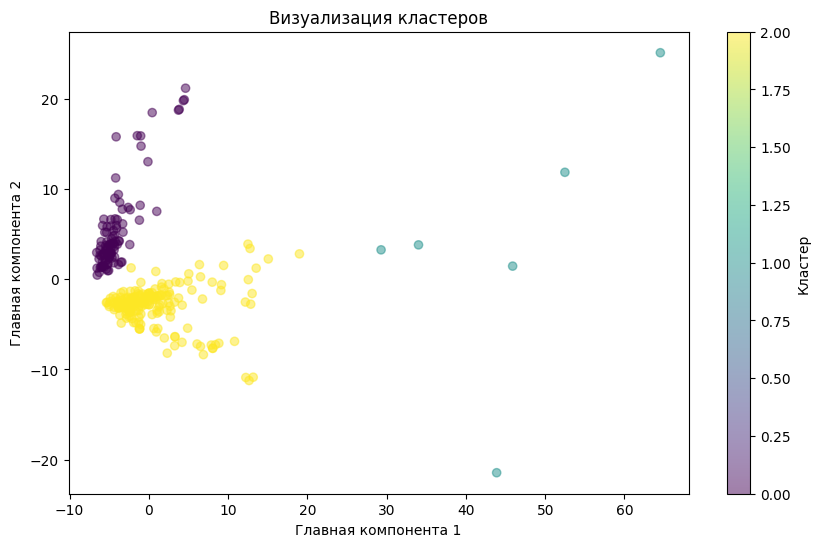

In [29]:
plt.figure(figsize=(10, 6))                                              # Визуализация кластеров
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Визуализация кластеров')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Кластер')
plt.show()